In [142]:
import time
from telemetry import acSharedMemory
from IPython.display import clear_output
import datetime
import pandas as pd
import numpy as np
import keyboard
import matplotlib.pyplot as plt

In [143]:
asm = acSharedMemory()

In [87]:
sm = asm.read_shared_memory()

if (sm is not None):
    print("Physics:")
    print(f"Pad life: {sm.Physics.pad_life}")

    print("Graphics:")
    print(f"Strategy tyre set: {sm.Graphics.penalty.name}")

    print("Static: ")
    print(f"Max RPM: {sm.Static.max_rpm}")

    print(f"{sm.Physics.tyre_contact_point.front_right.x=}")
    print(f"{sm.Physics.tyre_contact_normal.front_right.x=}")
    print(f"{sm.Physics.tyre_contact_point.front_right.y=}")
    print(f"{sm.Physics.tyre_contact_normal.front_right.y=}")
    print(f"{sm.Physics.tyre_contact_point.front_left.x=}")
    print(f"{sm.Physics.tyre_contact_normal.front_left.x=}")
    print(f"{sm.Physics.tyre_contact_point.front_left.y=}")
    print(f"{sm.Physics.tyre_contact_normal.front_left.y=}")

asm.close()

Physics:
Pad life: FL: 0.0
FR: 0.0            
RL: 0.0
RR: 0.0
Graphics:
Strategy tyre set: No_penalty
Static: 
Max RPM: 9000
sm.Physics.tyre_contact_point.front_right.x=-1933.3934326171875
sm.Physics.tyre_contact_normal.front_right.x=0.06683360785245895
sm.Physics.tyre_contact_point.front_right.y=78.87875366210938
sm.Physics.tyre_contact_normal.front_right.y=0.9952898025512695
sm.Physics.tyre_contact_point.front_left.x=-1934.3511962890625
sm.Physics.tyre_contact_normal.front_left.x=0.033878181129693985
sm.Physics.tyre_contact_point.front_left.y=78.99493408203125
sm.Physics.tyre_contact_normal.front_left.y=0.9989036917686462
[ASM_Reader]: Closing memory maps.


***

### Collect track coordinates

In [144]:
asm = acSharedMemory()

timestamps = []
x = np.array([])
y = np.array([])
tyres_out = np.array([])
normalized_position = np.array([])
tyre_cp_fr_x = np.array([])
tyre_cp_fr_y = np.array([])
tyre_cp_fl_x = np.array([])

tyre_cp_fl_y = np.array([])
tyre_cn_fr_x = np.array([])
tyre_cn_fr_y = np.array([])
tyre_cn_fl_x = np.array([])
tyre_cn_fl_y = np.array([])

while True:

    clear_output(wait=True)

    sm = asm.read_shared_memory()

    if (sm is not None):

        # print(f"{len(timestamps)=}")
        # print(f"{len(x)=}")
        # print(f"{len(y)=}")
        # print(f"{len(tyres_out)=}")
        # print(f"{len(normalized_position)=}")
        # print(f"{len(tyre_cp_fr_x)=}")
        # print(f"{len(tyre_cp_fr_y)=}")
        # print(f"{len(tyre_cp_fl_x)=}")
        # print(f"{len(tyre_cp_fl_y)=}")
        # print(f"{len(tyre_cn_fr_x)=}")
        # print(f"{len(tyre_cn_fr_y)=}")
        # print(f"{len(tyre_cn_fl_x)=}")
        # print(f"{len(tyre_cn_fl_y)=}")

        timestamps.append(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S:%f"))

        car_position = sm.Graphics.car_coordinates[0]
        print(f"Position: {car_position.x=}, {car_position.y=}, {car_position.z=}")
        x = np.append(x, car_position.x)
        y = np.append(y, car_position.y)

        tyres_out = np.append(tyres_out, int(sm.Physics.number_of_tyres_out))

        normalized_position = np.append(normalized_position, sm.Graphics.normalized_car_position)

        tyre_cp_fr_x = np.append(tyre_cp_fr_x, sm.Physics.tyre_contact_point.front_right.x)
        tyre_cp_fr_y = np.append(tyre_cp_fr_y, sm.Physics.tyre_contact_point.front_right.y)

        tyre_cp_fl_x = np.append(tyre_cp_fl_x, sm.Physics.tyre_contact_point.front_left.x)
        tyre_cp_fl_y = np.append(tyre_cp_fl_y, sm.Physics.tyre_contact_point.front_left.y)
        
    else:
        print("Lost connection to ACC")
            

    if keyboard.is_pressed('q'):
        print("Stopping loop.")
        break

    time.sleep(0.5) 
    

Lost connection to ACC
Stopping loop.


In [145]:
print(f"{len(timestamps)=}")
print(f"{len(x)=}")
print(f"{len(y)=}")
print(f"{len(tyres_out)=}")
print(f"{len(normalized_position)=}")
print(f"{len(tyre_cp_fr_x)=}")
print(f"{len(tyre_cp_fr_y)=}")
print(f"{len(tyre_cp_fl_x)=}")
print(f"{len(tyre_cp_fl_y)=}")

len(timestamps)=295
len(x)=295
len(y)=295
len(tyres_out)=295
len(normalized_position)=295
len(tyre_cp_fr_x)=295
len(tyre_cp_fr_y)=295
len(tyre_cp_fl_x)=295
len(tyre_cp_fl_y)=295


In [146]:
df = pd.DataFrame({
        "timestamp": timestamps, 
        "x": x, "y": y, 
        "tyres_out": tyres_out, 
        "normalized_position": normalized_position,
        "tyre_cp_fr_x": tyre_cp_fr_x,
        "tyre_cp_fr_y": tyre_cp_fr_y,
        "tyre_cp_fl_x": tyre_cp_fl_x,
        "tyre_cp_fl_y": tyre_cp_fl_y
    })

In [149]:
df.head()

,timestamp,x,y,tyres_out,normalized_position,tyre_cp_fr_x,tyre_cp_fr_y,tyre_cp_fl_x,tyre_cp_fl_y
0,2023-07-08 03:31:24:301607,2.520710,-538.200867,0.0,0.849535,173.497665,2.103467,172.405396,2.134437
1,2023-07-08 03:31:24:804606,2.520983,-538.200989,0.0,0.849535,173.497803,2.103463,172.405609,2.134433
2,2023-07-08 03:31:25:307605,2.521156,-538.201111,0.0,0.849535,173.497986,2.103459,172.405823,2.134427
3,2023-07-08 03:31:25:809630,2.521269,-538.201233,0.0,0.849535,173.498215,2.103455,172.406036,2.134422
4,2023-07-08 03:31:26:311630,2.521990,-538.216980,0.0,0.849538,173.525253,2.102855,172.432129,2.133806


In [116]:
# nurb_df = df
# nord_df = df

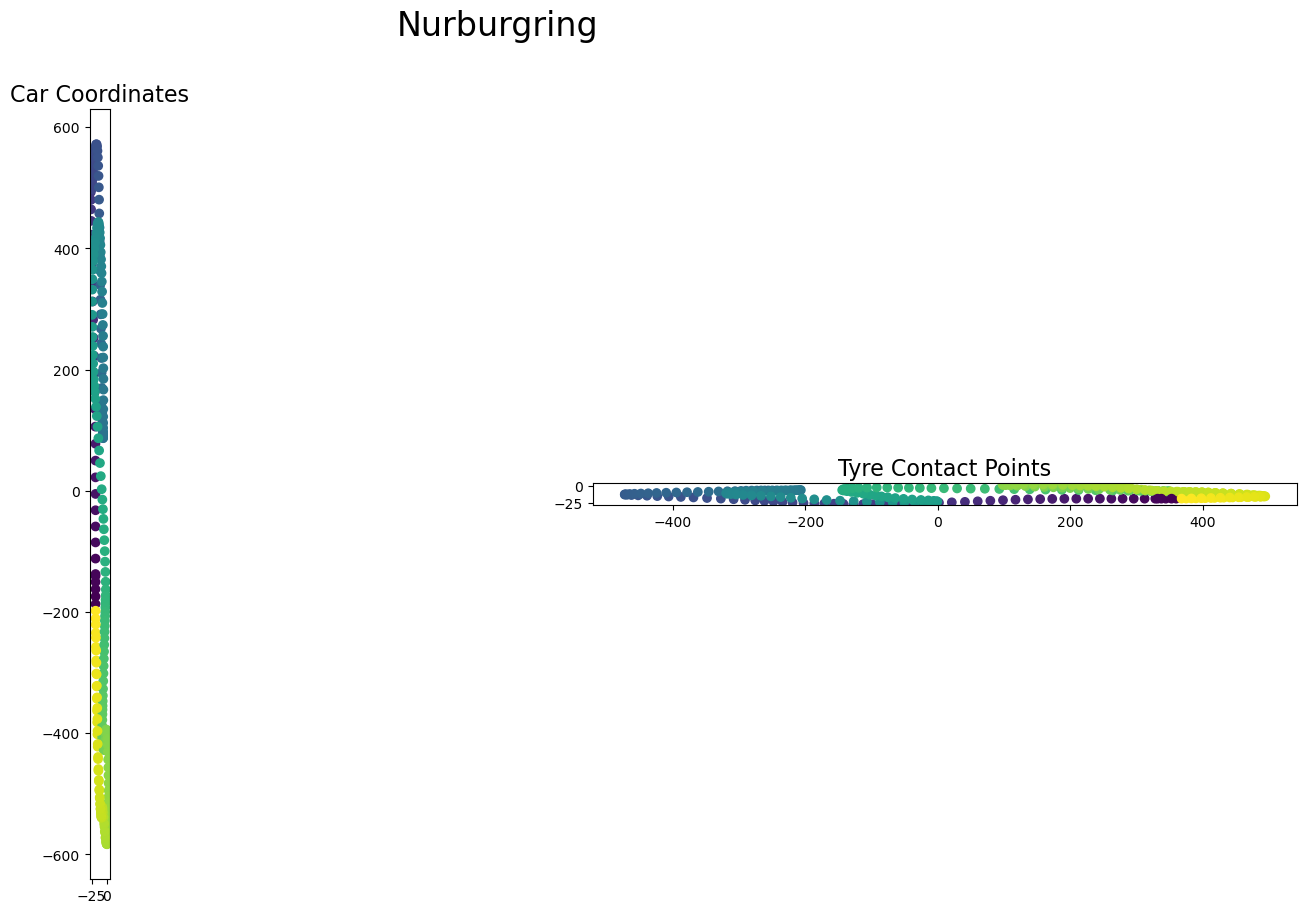

In [152]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle('Nurburgring', fontsize=24)
axs[0].set_title("Car Coordinates", fontsize=16)
axs[0].scatter(df.x, df.y, c=df.normalized_position, cmap="viridis")
axs[1].set_title("Tyre Contact Points", fontsize=16)
axs[1].scatter(df.tyre_cp_fr_x, df.tyre_cp_fr_y, c=df.normalized_position, cmap="viridis")

axs[0].set_aspect('equal', 'box')
axs[1].set_aspect('equal', 'box')
plt.show()

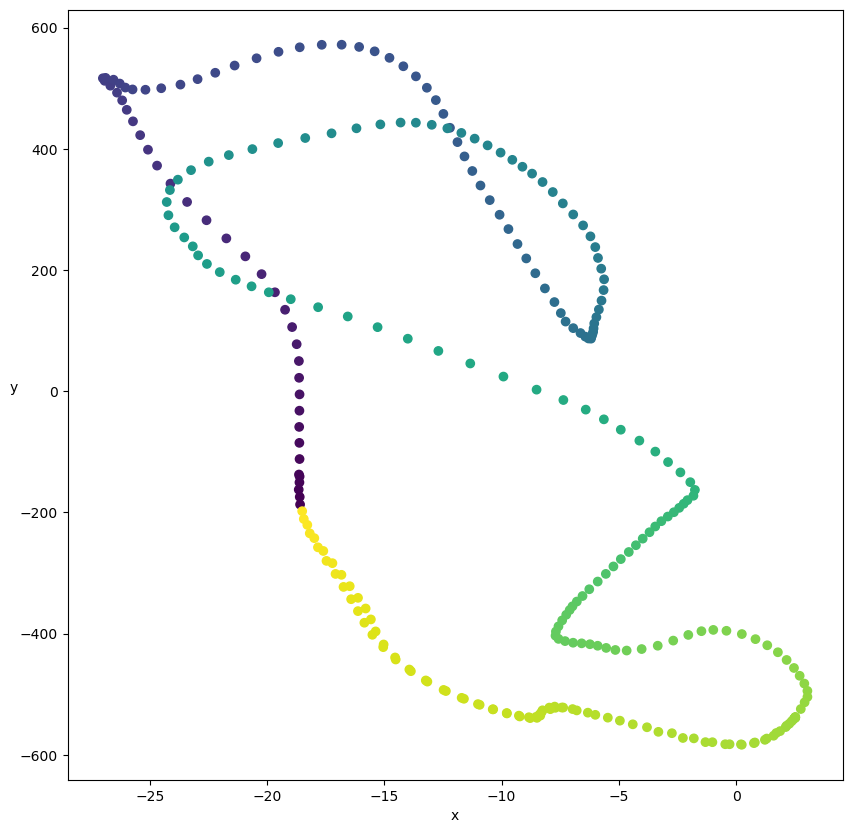

In [155]:
plt.figure(figsize=(10, 10))
plt.scatter(df.x, df.y, c=df.normalized_position, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
# plt.axis('equal')
plt.show()

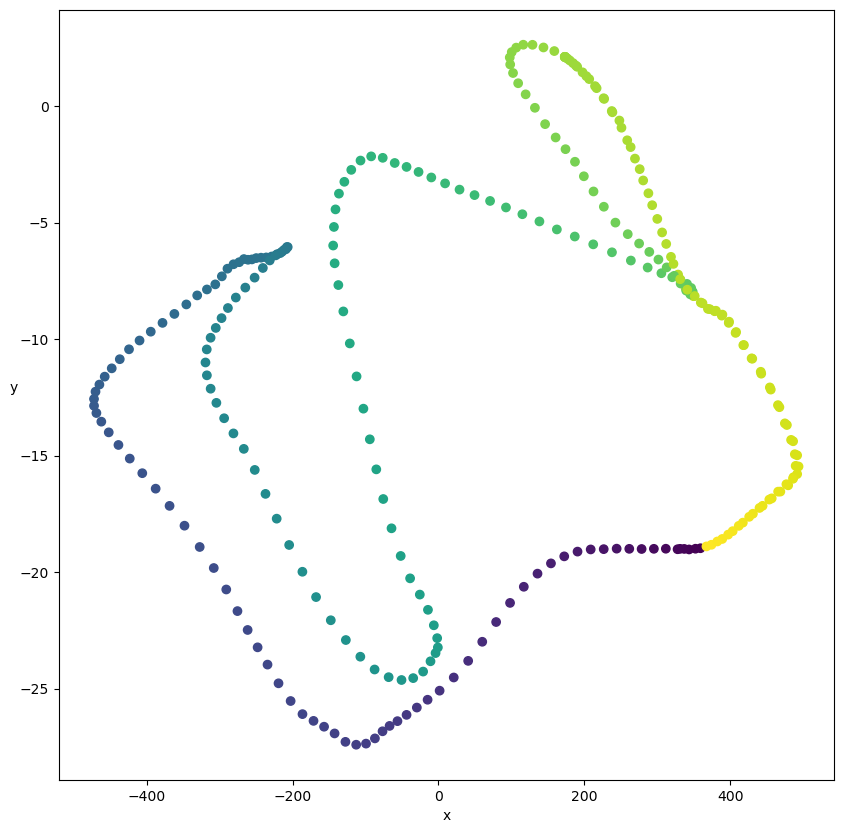

In [157]:
plt.figure(figsize=(10, 10))
plt.scatter(df.tyre_cp_fr_x, df.tyre_cp_fr_y, c=df.normalized_position, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
# plt.axis('equal')
plt.show()

Text(0, 0.5, 'y')

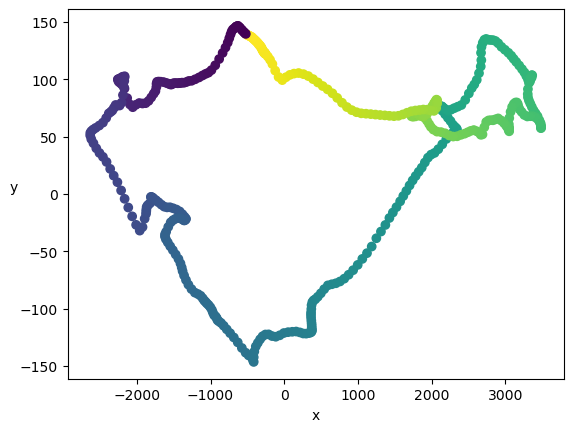

In [101]:
plt.scatter(nord_df.x, nord_df.y, c=df.normalized_position, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y", rotation=0)

In [ ]:
plt.scatter(nord_df.x, nord_df.y, c=df.normalized_position, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y", rotation=0)

***

In [5]:
asm = acSharedMemory()

while True:

    sm = asm.read_shared_memory()

    if (sm is not None):

        print("Physics:")
        print(f"packed_id: {sm.Physics.packed_id}")
        print(f"gas: {sm.Physics.gas}")
        print(f"brake: {sm.Physics.brake}")
        print(f"fuel: {sm.Physics.fuel}")
        print(f"gear: {sm.Physics.gear}")
        print(f"rpm: {sm.Physics.rpm}")
        print(f"steer_angle: {sm.Physics.steer_angle}")
        print(f"speed_kmh: {sm.Physics.speed_kmh}")
        print(f"velocity: {sm.Physics.velocity}")
        print(f"g_force: {sm.Physics.g_force}")
        print(f"wheel_slip: {sm.Physics.wheel_slip}")
        print(f"wheel_pressure: {sm.Physics.wheel_pressure}")
        print(f"wheel_angular_s: {sm.Physics.wheel_angular_s}")
        print(f"tyre_core_temp: {sm.Physics.tyre_core_temp}")
        print(f"suspension_travel: {sm.Physics.suspension_travel}")
        print(f"tc: {sm.Physics.tc}")
        print(f"heading: {sm.Physics.heading}")
        print(f"pitch: {sm.Physics.pitch}")
        print(f"roll: {sm.Physics.roll}")
        print(f"car_damage: {sm.Physics.car_damage}")
        print(f"pit_limiter_on: {sm.Physics.pit_limiter_on}")
        print(f"abs: {sm.Physics.abs}")
        print(f"autoshifter_on: {sm.Physics.autoshifter_on}")
        print(f"turbo_boost: {sm.Physics.turbo_boost}")
        print(f"air_temp: {sm.Physics.air_temp}")
        print(f"road_temp: {sm.Physics.road_temp}")
        print(f"local_angular_vel: {sm.Physics.local_angular_vel}")
        print(f"final_ff: {sm.Physics.final_ff}")
        print(f"brake_temp: {sm.Physics.brake_temp}")
        print(f"clutch: {sm.Physics.clutch}")
        print(f"is_ai_controlled: {sm.Physics.is_ai_controlled}")
        print(f"tyre_contact_point: {sm.Physics.tyre_contact_point}")
        print(f"tyre_contact_normal: {sm.Physics.tyre_contact_normal}")
        print(f"tyre_contact_heading: {sm.Physics.tyre_contact_heading}")
        print(f"brake_bias: {sm.Physics.brake_bias}")
        print(f"local_velocity: {sm.Physics.local_velocity}")
        print(f"slip_ratio: {sm.Physics.slip_ratio}")
        print(f"slip_angle: {sm.Physics.slip_angle}")
        print(f"suspension_damage: {sm.Physics.suspension_damage}")
        print(f"water_temp: {sm.Physics.water_temp}")
        print(f"brake_pressure: {sm.Physics.brake_pressure}")
        print(f"front_brake_compound: {sm.Physics.front_brake_compound}")
        print(f"rear_brake_compound: {sm.Physics.rear_brake_compound}")
        print(f"pad_life: {sm.Physics.pad_life}")
        print(f"disc_life: {sm.Physics.disc_life}")
        print(f"wheel_slip: {sm.Physics.ignition_on}")
        print(f"wheel_slip: {sm.Physics.starter_engine_on}")
        print(f"wheel_slip: {sm.Physics.is_engine_running}")
        print(f"kerb_vibration: {sm.Physics.kerb_vibration}")
        print(f"slip_vibration: {sm.Physics.slip_vibration}")
        print(f"g_vibration: {sm.Physics.g_vibration}")
        print(f"abs_vibration: {sm.Physics.abs_vibration}")
    
        print()
        print()

        print("Graphics Map:")
        print(f"packed_id: {sm.Graphics.packed_id}")
        print(f"status: {sm.Graphics.status}")
        print(f"session_type: {sm.Graphics.session_type}")
        print(f"current_time_str: {sm.Graphics.current_time_str}")
        print(f"last_time_str: {sm.Graphics.last_time_str}")
        print(f"best_time_str: {sm.Graphics.best_time_str}")
        print(f"last_sector_time_str: {sm.Graphics.last_sector_time_str}")
        print(f"completed_lap: {sm.Graphics.completed_lap}")
        print(f"position: {sm.Graphics.position}")
        print(f"current_time: {sm.Graphics.current_time}")
        print(f"last_time: {sm.Graphics.last_time}")
        print(f"best_time: {sm.Graphics.best_time}")
        print(f"session_time_left: {sm.Graphics.session_time_left}")
        print(f"distance_traveled: {sm.Graphics.distance_traveled}")
        print(f"is_in_pit: {sm.Graphics.is_in_pit}")
        print(f"current_sector_index: {sm.Graphics.current_sector_index}")
        print(f"last_sector_time: {sm.Graphics.last_sector_time}")
        print(f"number_of_laps: {sm.Graphics.number_of_laps}")
        print(f"tyre_compound: {sm.Graphics.tyre_compound}")
        print(f"normalized_car_position: {sm.Graphics.normalized_car_position}")
        print(f"active_cars: {sm.Graphics.active_cars}")

        x = round(sm.Graphics.car_coordinates[0].x,3)
        y = round(sm.Graphics.car_coordinates[0].y,3)
        z = round(sm.Graphics.car_coordinates[0].z,3)
        print(f"car_coordinates: x:{x}, y:{y}, z:{z}")
        
        # print(f"car_id: {sm.Graphics.car_id}")
        print(f"player_car_id: {sm.Graphics.player_car_id}")
        print(f"penalty_time: {sm.Graphics.penalty_time}")
        print(f"flag: {sm.Graphics.flag}")
        print(f"penalty: {sm.Graphics.penalty}")
        print(f"ideal_line_on: {sm.Graphics.ideal_line_on}")
        print(f"is_in_pit_lane: {sm.Graphics.is_in_pit_lane}")
        print(f"mandatory_pit_done: {sm.Graphics.mandatory_pit_done}")
        print(f"wind_speed: {sm.Graphics.wind_speed}")
        print(f"wind_direction: {sm.Graphics.wind_direction}")
        print(f"is_setup_menu_visible: {sm.Graphics.is_setup_menu_visible}")
        print(f"main_display_index: {sm.Graphics.main_display_index}")
        print(f"secondary_display_index: {sm.Graphics.secondary_display_index}")
        print(f"tc_level: {sm.Graphics.tc_level}")
        print(f"tc_cut_level: {sm.Graphics.tc_cut_level}")
        print(f"engine_map: {sm.Graphics.engine_map}")
        print(f"abs_level: {sm.Graphics.abs_level}")
        print(f"fuel_per_lap: {sm.Graphics.fuel_per_lap}")
        print(f"rain_light: {sm.Graphics.rain_light}")
        print(f"flashing_light: {sm.Graphics.flashing_light}")
        print(f"light_stage: {sm.Graphics.light_stage}")
        print(f"exhaust_temp: {sm.Graphics.exhaust_temp}")
        print(f"wiper_stage: {sm.Graphics.wiper_stage}")
        print(f"driver_stint_total_time_left: {sm.Graphics.driver_stint_total_time_left}")
        print(f"driver_stint_time_left: {sm.Graphics.driver_stint_time_left}")
        print(f"rain_tyres: {sm.Graphics.rain_tyres}")
        print(f"session_index: {sm.Graphics.session_index}")
        print(f"used_fuel: {sm.Graphics.used_fuel}")
        print(f"delta_lap_time_str: {sm.Graphics.delta_lap_time_str}")
        print(f"delta_lap_time: {sm.Graphics.delta_lap_time}")
        print(f"estimated_lap_time_str: {sm.Graphics.estimated_lap_time_str}")
        print(f"estimated_lap_time: {sm.Graphics.estimated_lap_time}")
        print(f"is_delta_positive: {sm.Graphics.is_delta_positive}")
        print(f"last_sector_time: {sm.Graphics.last_sector_time}")
        print(f"is_valid_lap: {sm.Graphics.is_valid_lap}")
        print(f"fuel_estimated_laps: {sm.Graphics.fuel_estimated_laps}")
        print(f"track_status: {sm.Graphics.track_status}")
        print(f"missing_mandatory_pits: {sm.Graphics.missing_mandatory_pits}")
        print(f"clock: {sm.Graphics.clock}")
        print(f"direction_light_left: {sm.Graphics.direction_light_left}")
        print(f"direction_light_right: {sm.Graphics.direction_light_right}")
        print(f"global_yellow: {sm.Graphics.global_yellow}")
        print(f"global_yellow_s1: {sm.Graphics.global_yellow_s1}")
        print(f"global_yellow_s2: {sm.Graphics.global_yellow_s2}")
        print(f"global_yellow_s3: {sm.Graphics.global_yellow_s3}")
        print(f"global_white: {sm.Graphics.global_white}")
        print(f"global_green: {sm.Graphics.global_green}")
        print(f"global_chequered: {sm.Graphics.global_chequered}")
        print(f"global_red: {sm.Graphics.global_red}")
        print(f"mfd_tyre_set: {sm.Graphics.mfd_tyre_set}")
        print(f"mfd_fuel_to_add: {sm.Graphics.mfd_fuel_to_add}")
        print(f"mfd_tyre_pressure: {sm.Graphics.mfd_tyre_pressure}")
        print(f"track_grip_status: {sm.Graphics.track_grip_status}")
        print(f"rain_intensity: {sm.Graphics.rain_intensity}")
        print(f"rain_intensity_in_10min: {sm.Graphics.rain_intensity_in_10min}")
        print(f"rain_intensity_in_30min: {sm.Graphics.rain_intensity_in_30min}")
        print(f"current_tyre_set: {sm.Graphics.current_tyre_set}")
        print(f"strategy_tyre_set: {sm.Graphics.strategy_tyre_set}")
        print(f"gap_ahead: {sm.Graphics.gap_ahead}")
        print(f"gap_behind: {sm.Graphics.gap_behind}")

        print()
        print()

        print("Statics Map:")
        print(f"sm_version: {sm.Static.sm_version}")
        print(f"ac_version: {sm.Static.ac_version}")
        print(f"number_of_session: {sm.Static.number_of_session}")
        print(f"num_cars: {sm.Static.num_cars}")
        print(f"car_model: {sm.Static.car_model}")
        print(f"track: {sm.Static.track}")
        print(f"player_name: {sm.Static.player_name}")
        print(f"player_surname: {sm.Static.player_surname}")
        print(f"player_nick: {sm.Static.player_nick}")
        print(f"sector_count: {sm.Static.sector_count}")
        print(f"max_rpm: {sm.Static.max_rpm}")
        print(f"max_fuel: {sm.Static.max_fuel: }")
        print(f"penalty_enabled: {sm.Static.penalty_enabled:}")
        print(f"aid_fuel_rate: {sm.Static.aid_fuel_rate: }")
        print(f"aid_tyre_rate: {sm.Static.aid_tyre_rate: }")
        print(f"aid_mechanical_damage: {sm.Static.aid_mechanical_damage: }")
        print(f"aid_stability: {sm.Static.aid_stability: }")
        print(f"aid_auto_clutch: {sm.Static.aid_auto_clutch:}")
        print(f"pit_window_start: {sm.Static.pit_window_start}")
        print(f"pit_window_end: {sm.Static.pit_window_end}")
        print(f"is_online: {sm.Static.is_online:}")
        print(f"dry_tyres_name: {sm.Static.dry_tyres_name}")
        print(f"wet_tyres_name: {sm.Static.wet_tyres_name}")
        
    else:
        print("Lost connection to ACC")
        
    clear_output(wait=True)

    time.sleep(0.5) 

KeyboardInterrupt: 

***

#### Converting milliseconds to datetime

In [ ]:
# convert miliseconds to datetime
def ms_to_datetime(ms):
    return datetime.datetime.fromtimestamp(ms / 1000.0)

In [15]:
# 386517 = 6:26.517

t = 386517 / 1000

t1 = int(t // 60)

t2 = round(t % 60,3)

print(f"{t1}:{t2}")

6:26.517


***